## Read Data
### Resources Used
- [Waveform Database Software Package](https://github.com/MIT-LCP/wfdb-python)
- [WFDB Demo Scripts](https://github.com/MIT-LCP/wfdb-python/blob/main/demo.ipynb)
- [WFDB EDF API](https://wfdb.readthedocs.io/en/latest/convert.html#module-wfdb.io.convert.edf)
- [MNE Library Install](https://mne.tools/stable/install/index.html)
- [MNE Documentation for Annotations](https://mne.tools/dev/generated/mne.read_annotations.html)
- [MNE Python](https://github.com/mne-tools/mne-python/blob/maint/0.20/mne/datasets/sleep_physionet/age.py#L18-L111)
- [Physionet Sleep-EDF Database](https://www.physionet.org/content/sleep-edfx/1.0.0/)

In [ ]:
%pip install mne
%pip install wfdb

In [28]:
import wfdb
import wfdb.io.convert
import matplotlib.pyplot as plt 
import mne
import os

In [ ]:
#Get header data
record = wfdb.io.convert.edf.read_edf('sleep-edf-database/sleep-cassette/SC4011E0-PSG.edf', verbose = True)
display(record)

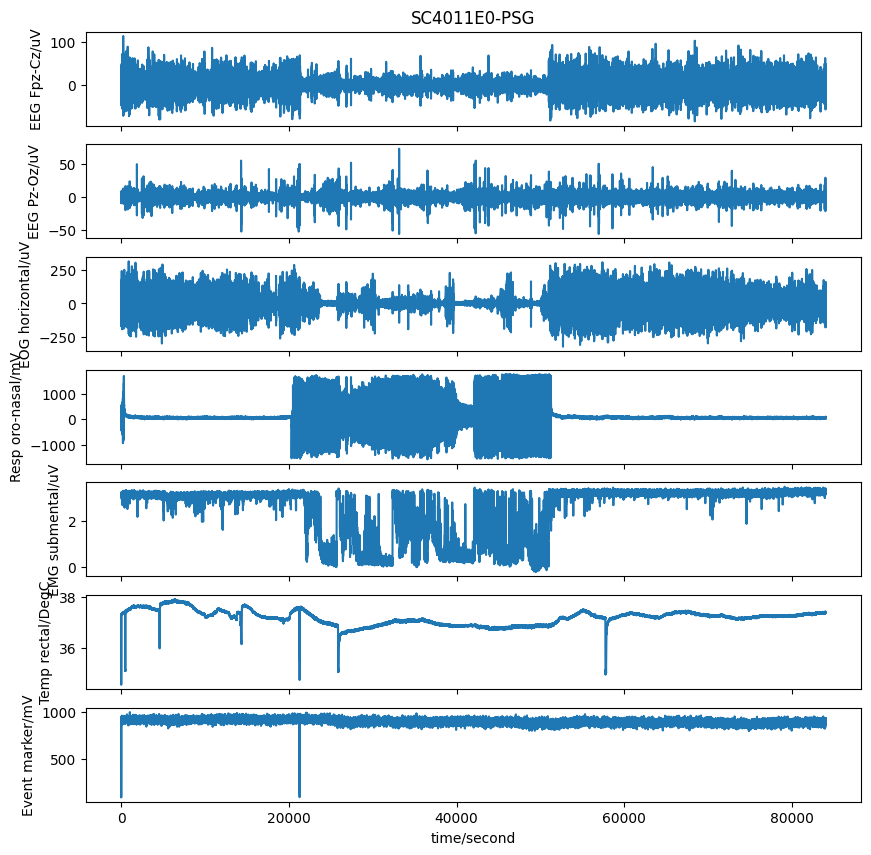

In [59]:
#Plot data and display data for single file
# record = wfdb.io.convert.edf.read_edf('sleep-edf-database/sleep-cassette/SC4001E0-PSG.edf')
record = wfdb.io.convert.edf.read_edf('sleep-edf-database/sleep-cassette/SC4011E0-PSG.edf')
wfdb.plot_wfdb(record=record, title='SC4011E0-PSG', figsize=(10,10)) #plot signals
# display(record.__dict__)

In [21]:
#Read EEG Data for 1 File
#each entry (i) is a second, and info in first index is EEG data
record1EegData = list()
for i in record.__dict__['p_signal']:
    record1EegData.append(i[0])
# print(record1EegData)

Text(0, 0.5, 'EEG Fpz-Cz/uV')

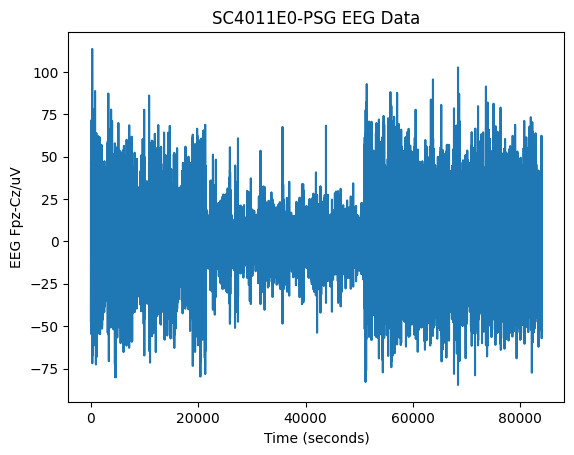

In [40]:
#plot just EEG data
plt.plot(record1EegData)
plt.title("SC4011E0-PSG EEG Data")
plt.xlabel("Time (seconds)")
plt.ylabel("EEG Fpz-Cz/uV")
# plt.figure(figsize=(10,100), dpi=150)

In [ ]:
#read annotation to get sleep stage for one file
annotations = mne.read_annotations('sleep-edf-database/sleep-cassette/SC4011EH-Hypnogram.edf')
for i in range(len(annotations.description)):
  print(annotations.onset[i], ":", annotations.description[i])

In [ ]:
#Iterate through all files in directory
directory = './sleep-edf-database/sleep-cassette/'
psgFilesList = list()
hypnogramFilesList = list()
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        if(str(f).__contains__('PSG.edf')):
            psgFilesList.append(f)
        elif(str(f).__contains__('Hypnogram.edf')):
            hypnogramFilesList.append(f)
psgFilesList.sort()
hypnogramFilesList.sort()
# print(psgFilesList)
# print(hypnogramFilesList)

In [47]:
#get EEG and annotation data for all files
eegData = list()
sleedStageData = list()

for i in range(len(psgFilesList)):
    curRecord = wfdb.io.convert.edf.read_edf(psgFilesList[i])
    curEegData = list()
    for curSignal in record.__dict__['p_signal']:
        curEegData.append(curSignal[0])
    eegData.append(curEegData)

    curFileAnn =  mne.read_annotations(hypnogramFilesList[i])
    currentFileSleedStageData = list()
    for j in range(len(annotations.description)):
        curNotes = tuple([annotations.onset[j], annotations.description[j]])
        currentFileSleedStageData.append(curNotes)
    sleedStageData.append(currentFileSleedStageData)


SC4001E0-PSG
[(0.0, 'Sleep stage W'), (21540.0, 'Sleep stage 1'), (21900.0, 'Sleep stage 2'), (21960.0, 'Sleep stage 1'), (22020.0, 'Sleep stage 2'), (22200.0, 'Sleep stage 1'), (22710.0, 'Sleep stage W'), (22740.0, 'Sleep stage 1'), (22890.0, 'Sleep stage 2'), (23070.0, 'Sleep stage 1'), (23280.0, 'Sleep stage W'), (23340.0, 'Sleep stage 1'), (23520.0, 'Sleep stage 2'), (23880.0, 'Sleep stage 3'), (23910.0, 'Sleep stage 2'), (24030.0, 'Sleep stage 3'), (24720.0, 'Sleep stage 2'), (24750.0, 'Sleep stage 3'), (25110.0, 'Sleep stage 4'), (25140.0, 'Sleep stage 3'), (25260.0, 'Sleep stage 4'), (25290.0, 'Sleep stage 3'), (25380.0, 'Sleep stage 4'), (25440.0, 'Sleep stage 3'), (25500.0, 'Sleep stage 4'), (25530.0, 'Sleep stage 3'), (25650.0, 'Sleep stage 4'), (25680.0, 'Sleep stage 3'), (25710.0, 'Sleep stage 2'), (25800.0, 'Sleep stage W'), (26070.0, 'Sleep stage 1'), (26160.0, 'Sleep stage 2'), (26850.0, 'Sleep stage W'), (26970.0, 'Sleep stage 1'), (27180.0, 'Sleep stage 2'), (27390.0, 

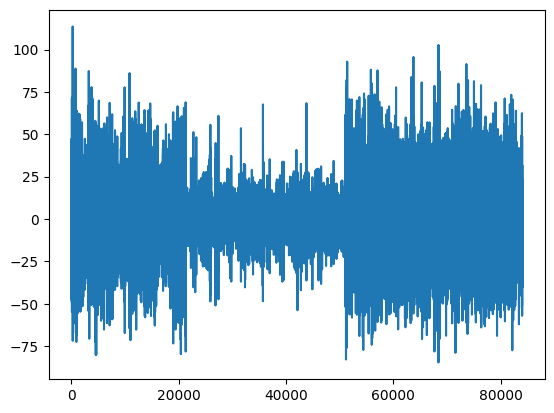

In [52]:
print(psgFilesList[0].strip('./sleep-edf-database/sleep-cassette/'))
plt.plot(eegData[0])
print(sleedStageData[0])

## Perform Fourier Transform
### Purpose
The purpose of applying Fourier Transform on our EEG data is to convert our data from micro volts over time to be based on frequency, allowing us to extract features in the frequency domain. Here, we are using Numpy's one-dimensional discrete Fourier Transform function, which uses the Fast Fourier Transform (FFT) algorithm.
### Resources Used
- [Numpy Discrete Fourier Transform](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html)
- [Intro to Fourier Transform Video](https://www.youtube.com/watch?v=spUNpyF58BY)


In [53]:
import numpy.fft as FourierTransform

In [54]:
fftArray = FourierTransform.fft(eegData[0])

Text(0, 0.5, 'Frequency')

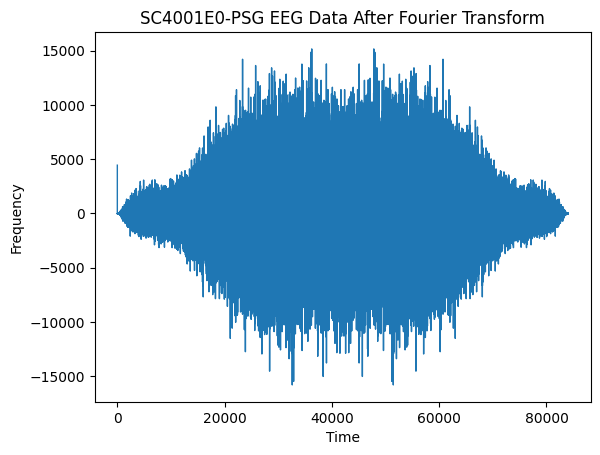

In [58]:
#graph using MatPlotLib
plt.plot(fftArray, linewidth=1)
plt.title(psgFilesList[0].strip('./sleep-edf-database/sleep-cassette/') + " EEG Data After Fourier Transform")
plt.xlabel("Time")
plt.ylabel("Frequency") #?